# BLG454E - Learning From Data, Homework 3

In this homework, you are supposed to implement following parts:

 -  **Part 1: Soft-margin SVM loss and one-versus-all classification (40 points)**
     - Refer to Machine Learning Blinks 8 and 9 for this part.
     - ML Blinks 8: https://www.youtube.com/watch?v=KWp_TxnWfSU&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ
     - ML Blinks 9: https://www.youtube.com/watch?v=7bIVFiKpMfg&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ
     
     
 - **Part 2: practice dimensionality reduction (20 points)**
     - Refer to Machine Learning Blinks 10 and 11 for this part:
     - ML Blinks 10: https://www.youtube.com/watch?v=laeth5oT9YM&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ
     - ML Blinks 11: https://www.youtube.com/watch?v=mRmVKNklE9I&list=PLug43ldmRSo1LDlvQOPzgoJ6wKnfmzimQ
     
     
 - **Part 3: solve an SVM optimization problem by hand (40 points)**
 
 
 ### Important Notes:
   - Please complete this template and include any other necessary materials (screenshots of your handwritten solutions etc.) into the HW3 folder. Then zip it again and submit to Ninova.
   - For Part 1, you need to implement the required functions and gradients etc. by yourself. Do not use autograd or any built-in functions.
   - For the Part 2, you can use scikit-learn built-in functions for training a learner, feature selector and PCA. 
   - At Part 3, you can upload the screenshots of your handwritten solutions to the Notebook. But please be sure that your solutions are neat and can be read properly.
   - You can ask your questions on Ninova message board or send an e-mail to akti15@itu.edu.tr.
    



In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, RezaBorhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import pandas as pd

## Part 1.1: Code up gradient descent for the softmax approximation of SVM loss (20 points)

We have seen the margin perceptron and its implementation at previous lectures. SVM loss also uses the margin loss as base and tries to define and maximize a margin between classes as the following figure shows.


<img src="images/part1-1.png" width = "450">


The soft-margin SVM loss with regularization can be calculated using following equation.

<br>


$g(b, w) = \sum_{p=1}^{P} max(0, 1 - y_{p}(b + x_{p}^T w)) + \lambda\left \| w \right \|_2^2$ 


<br>

We can write this loss formula using the softmax approximation as follows:


<br>

$g(b, w) = \sum_{p=1}^{P} log ( 1 + e^{- y_{p}(b + x_{p}^T w)}) + \lambda\left \| w \right \|_2^2$ 

<br>

Please note that the following template creates w and x vectors as $ \tilde{x}_{p} = \begin{bmatrix} 1\\x_{p}\end{bmatrix}^T$ and $\tilde{w} = \begin{bmatrix}b\\w \end{bmatrix} $

We will use gradient descent to minimize softmax approximation of soft-margin SVM loss in order to fit a linear classifier on given overlapping 2-class dataset.

Following function loads data, creates X and y matrices.

In [2]:
# import training data 
def load_data(csvname):
    # load in data
    data = np.asarray(pd.read_csv(csvname,header = None))

    X = data[:,0:-1]
    y = data[:,-1]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    
    return X,y

**(10 points)** The following function finds the optimal w values for the given input. The parameters of the function are samples in X, labels in y, initial w value, learning rate alpha and the regularization parameter $\lambda$. You need to calculate the gradient of the given **softmax approximated SVM loss with regularization**  function and apply gradient descent (you can use Vanilla gradient descent here). **Do not forget to add the regularization term into gradient and remind that bias term should not be included in regularization.**

In [3]:
### TODO: YOUR CODE GOES HERE ###
# run gradient descent
def gradient_descent_soft_cost(X,y,w,alpha,lam):
    # start gradient descent loop
    max_its = 10000

    for k in range(max_its):
        regularization= 2.0 * lam * w
        grad = -X.T @ ((1/ (1 + np.exp(y * (X @ w)))) * y) + regularization
        w = w - grad * alpha

    return w

**(5 points)** The following plot function plots the data points and the separating line. Here, you need to add $x_1$ and $x_2$ lines to the plot in order to see the margins as shown in Fig 4.14 above. Please show the margins with dashed lines in order to get a better visualisation.

In [4]:
### TODO: YOUR CODE GOES HERE ###
# plotting functions
def plot_all(X,y,w,lam):
    # custom colors for plotting points
    red = [1,0,0.4]  
    blue = [0,0.4,1]
    
    # scatter plot points
    fig = plt.figure(figsize = (4,4))
    ind = np.argwhere(y==1)
    ind = [s[0] for s in ind]
    plt.scatter(X[ind,1],X[ind,2],color = red,edgecolor = 'k',s = 25)
    ind = np.argwhere(y==-1)
    ind = [s[0] for s in ind]
    plt.scatter(X[ind,1],X[ind,2],color = blue,edgecolor = 'k',s = 25)
    plt.grid('off')
    
    # plot separator
    s = np.linspace(-1,1,100) 
    plt.plot(s,(-w[0]-w[1]*s)/w[2],color = 'k',linewidth = 2)
    
    #### HINT ####
    # The above line is b + X.T w = 0 or ax + by + c = 0 as a is w[1], b is w[2] and c is w[0]
    # It is written in form of y = ( - c - ax )/b
    # You need to plot b + X.T w = +1 and b + X.T w = -1 which means ax + by + c = +1 and ax + by + c = -1
    
    # Plot the line equations with following 2 lines of code
    
    plt.plot(s,(1-w[0]-w[1]*s)/w[2], 'r--',linewidth = 2)
    plt.plot(s,(-1-w[0]-w[1]*s)/w[2], 'r--',linewidth = 2)

    # clean up plot
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.title('soft-margin svm with lambda = ' + str(lam))
    plt.show()

In the following cell you need to run 5 experiments which are:
   - No regularization
   - Regularization with $\lambda = 10^{-2}$
   - Regularization with $\lambda = 10^{-1}$
   - Regularization with $\lambda = 1$
   - Regularization with $\lambda = 10$

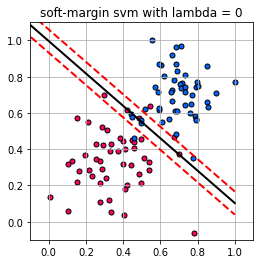

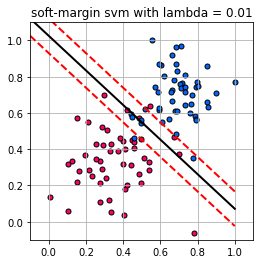

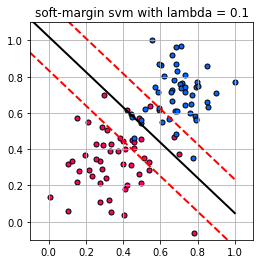

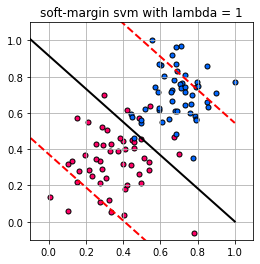

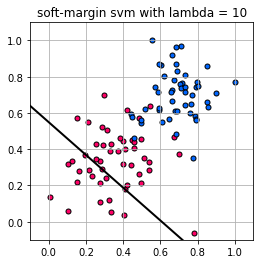

In [5]:
# load data

X,y = load_data('overlapping_2class.csv')
w0 = np.random.randn(3,1)

alpha = 10**(-2)
lams = [0, 10**-2, 10**-1, 1, 10]
for lam in lams:
    # run gradi ent descent
    w = gradient_descent_soft_cost(X,y,w0,alpha,lam)

    # plot points and separator
    plot_all(X,y,w,lam)

**(5 points)** Answer the following questions.
 - What is the effect of regularization and lambda value on learner?
 - Briefly explain your experiment results. What is your observation on the best lambda value?


Regularization term is used to control complexity of the model that over-fits training dataset. We can obtain more generalizable model by dding some reasonable regularization value to loss function. Lambda defines weight of the regularization term in loss function. If we significantly increase lambda, effect of error function can be lost. Therefore, defining correct lambda value is important and the optimal lambda value changes according to dataset.

In our SVM case, usage of higher lambda value provides wider support vector margin, we can easily observe change in the margin with each increase. In lambda=0 case, the margin is narrow and model highly tries to fit on training set but this is not a optimal solution. On the other hand, when lambda=10, model cannot fit on the training set.

According my observations the model learns best when lamdba=0.1 because when we look at the support vectors, they are not in misclassification region. The model does not try to fit points that are located on a are that has high overlapping. It fits to training set according to points that has higher confidence. Therefore, lambda=0.1 case is more generalizable and optimal than other lambda values.

## Part 1.2: Code up gradient descent for one-versus-all classifier (20 points)

In this part, you are supposed to apply classification on a toy dataset which contains $C = 4$ classes.

<img src="images/part1-2.png" width = "400">

As we have seen in the lectures, for OvA (One-versus-all) classification, we need to train 1 classifier for each class and then combine their outputs to get a single classifier that can separate all classes. For this experiment, you can use the **gradient descent for softmax loss** implementation that we have done at Tutorial 3, there can be minor changes needed due to matrix shape changes. **(4 points)**

In [6]:
### TODO: YOUR CODE GOES HERE ###
# gradient descent function for softmax cost/logistic regression 
def softmax_grad(X,y):
    # Initializations 
    w = np.random.randn(3,1)      # random initial point
    alpha = 10**-2
    max_its = 2000
    lam = 0.05
    
    for k in range(max_its):
        regularization_grad = 2.0 * lam * w
        grad = -X.T @ ((1/ (1 + np.exp(y * (X @ w)))) * y) + regularization_grad
        w = w - grad * alpha
    return w

**(8 points)** In the following cell, you need to train 1 classifier for each class. While sending the samples and labels into the optimizer, you need to assign the label for class C as -1 and the labels for all other classes should be assigned as 1 temporarily since we are doing one-versus-all classification. We keep the weight vectors for each class in W matrix in order to use them later for evaluating the performance.

In [7]:
### TODO: COMPLETE ONE VERSUS ALL SNIPPET BELOW ###
# learn all C separators
def learn_separators(X,y):
    W = []
    classes = np.unique(y)
    #iterates over classes
    for c in classes:
        y_temp = np.copy(y)
        y_temp.astype(int)
        #assigns -1 and 1 as labels
        y_temp[y_temp != int(c)] = -1
        y_temp[y_temp == int(c)] = 1
        #finds optimal classifier
        w = softmax_grad(X,y_temp)
        W.append(w)
    W = np.asarray(W)
    W.shape = (np.shape(W)[0],np.shape(W)[1])
    W = W.T
    return W

**(8 points)** Now, using the weight vectors we determined, we need to classify the samples in given matrices and calculate the overall accuracy score. In order to decide the class of a given sample using OvA classifier, we can use following formula:

<br>

$y = \underset{j = 1, 2, ..., C}{argmax} \ b_j + x^T w_j$ 

<br>


**Please do not loop over all samples but use the vectorized calculations.**

After predicting the labels for all samples in given set, we can calculate the accuracy as:

<br>

$ Accuracy = \frac{\#correct \ predictions}{\#total \ samples} $ 

<br>

Please be careful about the sizes of y and y_pred vectors and remind that the class numbers are starting from 1, not 0.

In [8]:
### TODO: COMPLETE ACCURACY SCORE FUNCTION BELOW ###

def accuracy_score(X, y, W):
    
    prediction = X@W
    classes = np.argmax(prediction, axis=1) + 1
    diffs = classes - y.T

    count = diffs[0].tolist().count(0)
    accuracy = count*100.0/len(X)
    return accuracy
    

In [9]:
# plot data, separators, and fused fule
def plot_all(X,y,W):
    # initialize figure, plot data, and dress up panels with axes labels etc.
    X = X.T
    num_classes = np.size(np.unique(y))
    color_opts = np.array([[1,0,0.4], [ 0, 0.4, 1],[0, 1, 0.5],[1, 0.7, 0.5],[0.7, 0.6, 0.5]])
    f,axs = plt.subplots(1,3,facecolor = 'white',figsize = (10,3))
    for a in range(0,3):
        for i in range(0,num_classes):
            s = np.argwhere(y == i+1)
            s = s[:,0]
            axs[a].scatter(X[1,s],X[2,s], s = 30,color = color_opts[i,:])

        # dress panel correctly
        axs[a].set_xlim(0,1)
        axs[a].set_ylim(0,1)
        axs[a].axis('off')

    r = np.linspace(0,1,150)
    for i in range(0,num_classes):
        z = -W[0,i]/W[2,i] - W[1,i]/W[2,i]*r
        axs[1].plot(r,z,'-k',linewidth = 2,color = color_opts[i,:])

    # fuse individual subproblem separators into one joint rule
    r = np.linspace(0,1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((np.ones((np.size(s),1)),s,t),1)
    f = np.dot(W.T,h.T)
    z = np.argmax(f,0)
    f.shape = (np.size(f),1)
    s.shape = (np.size(r),np.size(r))
    t.shape = (np.size(r),np.size(r))
    z.shape = (np.size(r),np.size(r))

    for i in range(0,num_classes + 1):
        axs[2].contour(s,t,z,num_classes-1,colors = 'k',linewidths = 2.25)

Now, we are ready to train and test our learner. At the end, you should get at least 70% accuracy.

Accuracy:  72.5 %


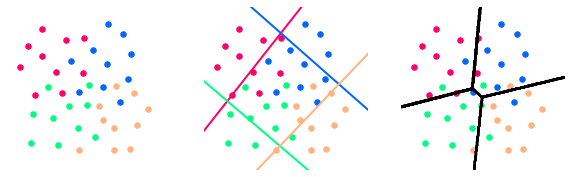

In [21]:
X ,y  = load_data('four_class_data.csv')

# learn all C vs notC separators
W = learn_separators(X,y)

# calculate accuracies for both training and testing sets
accuracy = accuracy_score(X, y, W)

print("Accuracy: ", accuracy, '%')

# plot data and each subproblem 2-class separator
plot_all(X, y, W)

## Part 2: Feature selection using scikit-learn (20 points)

In this part, we will use scikit-learn library. You can install the necessary package using following commands:

        > python3 -m pip install scikit-learn
        > conda install -c conda-forge scikit-learn
        
There are lots of machine learning techniques that are available in scikit-learn library. In this problem we will use the **SVM** classifier with linear kernel and:
   
 **1)** Apply feature selection on data using Variance Threshold and examine the results.
    
 **2)** Apply dimensionality reduction with PCA to plot the data on 2D space.

You can check the documentations on the internet to learn how to use these functions and which parameters to use. Necessary functions are imported below.

In [11]:
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import sklearn.datasets as ds
import random
from sklearn.model_selection import train_test_split

We will implement feature selection on handwritten digits dataset. In the following cell we load and examine dataset. As you can see the samples are 8 by 8 images where in each row of X, the images are kept as flatten. Each feature represents a pixel (i.e 0th feature is (0, 0) pixel and 8th feature is (1, 0) pixel.

Number of samples:  1797
Number of attributes:  64
Classes:  [0 1 2 3 4 5 6 7 8 9]


<Figure size 432x288 with 0 Axes>

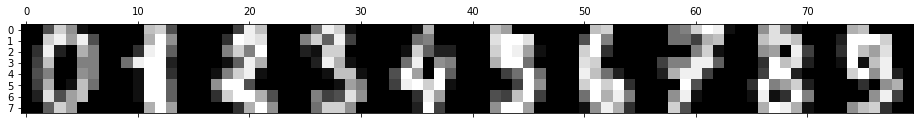

In [12]:
digit_data = ds.load_digits()
print("Number of samples: ", digit_data.data.shape[0])
print("Number of attributes: ", digit_data.data.shape[1])
print("Classes: ", digit_data.target_names)


c = digit_data.images[0]

for i in range(1, 10):
    c = np.concatenate((c, digit_data.images[i]), 1)

plt.gray() 
plt.matshow(c)
plt.show()

Then we split the data into training and testing sets in order to train the models on training set and test them on unseen test set.

In [13]:
X, y = digit_data.data, digit_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=20)

print("Number of training samples: ", X_train.shape[0])
print("Number of testing samples: ", X_test.shape[0])

Number of training samples:  1437
Number of testing samples:  360


In the following cell, you are given the necessary train and test functions, you can use them directly.

In [14]:
def train(X, y):
    
    classifier = SVC(gamma="auto", kernel="linear")
    classifier = classifier.fit(X,y)
    
    preds = classifier.predict(X)
    
    train_accuracy = np.mean(preds==y)
    
    return classifier, train_accuracy

def test(classifier, X, y):
    
    test_accuracy = np.mean(classifier.predict(X) == y)
    
    return test_accuracy

First, let's train an SVM on the whole data and print the accuracies on training and test sets.

In [15]:
# SVM classifier without feature selection
svm, train_acc = train(X_train, y_train)
test_acc = test(svm, X_test, y_test)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  1.0
Test accuracy:  0.975


**(5 points)** Now, fit a Variance Threshold feature selector on data. Print the number of selected features and the accuracies on training and test sets. Check the selected features. (You can use methods of VarianceThreshold to get the selected feature indexes.) 

In [16]:
##TODO: YOUR CODE GOES HERE##
selector = VarianceThreshold()
X_train_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)
print("Number of features: ", X_train.shape[1])
print("Number of selected features: ", X_train_selected.shape[1])
print("Deleted features: ",[x for x in range(0,63) if x not in selector.get_support(indices=True)] ) 
print("Selected features: ",selector.get_support( indices=True ))

# SVM classifier without feature selection
svm, train_acc = train(X_train_selected, y_train)
test_acc = test(svm, X_test_selected, y_test)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

Number of features:  64
Number of selected features:  60
Deleted features:  [0, 32, 39, 56]
Selected features:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 57 58 59 60 61 62 63]
Train accuracy:  1.0
Test accuracy:  0.975


In [17]:
print("Variences of features:")
print(np.var(X_train, axis=0))

Variences of features:
[0.00000000e+00 8.91602731e-01 2.30625012e+01 1.79823959e+01
 1.82461867e+01 3.17298894e+01 1.05707698e+01 1.00031526e+00
 9.71152594e-03 1.05075350e+01 2.90570716e+01 1.57551886e+01
 2.33241342e+01 3.65163312e+01 1.27119942e+01 5.88427235e-01
 4.85915285e-03 1.26629882e+01 3.24272529e+01 3.40566837e+01
 3.82878745e+01 3.82652253e+01 1.09263742e+01 1.55794106e-01
 1.38985137e-03 9.79426229e+00 3.84040729e+01 3.44375020e+01
 3.74384758e+01 3.42067227e+01 1.37633940e+01 2.08332425e-03
 0.00000000e+00 1.19183901e+01 4.00960896e+01 3.95903067e+01
 3.52505679e+01 3.43729964e+01 1.24415233e+01 0.00000000e+00
 2.49572754e-02 8.77110698e+00 4.25799370e+01 4.16594922e+01
 3.93542751e+01 3.27454010e+01 1.85091912e+01 1.06392880e-01
 4.58805919e-02 3.03220242e+00 3.18922521e+01 2.72513060e+01
 2.86923910e+01 3.59326489e+01 2.46553154e+01 8.43201036e-01
 0.00000000e+00 9.08637369e-01 2.64673271e+01 1.90640508e+01
 2.45801617e+01 3.51827383e+01 1.73046850e+01 3.51603535e+00]


Original Training Set Example:


<Figure size 432x288 with 0 Axes>

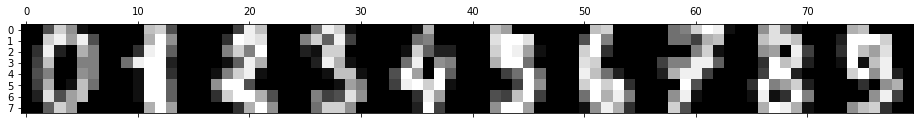

Training Set with Feature Selection Example:


<Figure size 432x288 with 0 Axes>

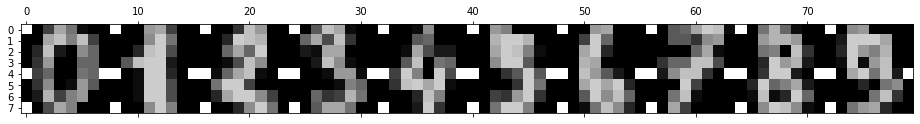

In [18]:
#Compares training set before and after performing feature selection

digit_data = ds.load_digits()
print("Original Training Set Example:")
c = digit_data.images[0]

for i in range(1, 10):
    c = np.concatenate((c, digit_data.images[i]), 1)

plt.gray() 
plt.matshow(c)
plt.show()

print("Training Set with Feature Selection Example:")

c = digit_data.images[0]
#recolors eliminated features
c[4][0] = 20
c[4][7] = 20
c[7][0] = 20
c[0][0] = 20

for i in range(1, 10):
    temp = digit_data.images[i]
    temp[4][0] = 20
    temp[4][7] = 20
    temp[7][0] = 20
    temp[0][0] = 20
    c = np.concatenate((c, temp), 1)

plt.gray() 
plt.matshow(c)
plt.show()

**(5 points) Question:**
- Compare the results of training with and without feature selection, what is your observation?
- Which features are eliminated? Comment on them by referring the method and the images displayed at load data cell.
- What type of feature selector the Variance Threshold is? Briefly explain.

Training with and without feature selection are given same accuracy value. It means that eliminated features do not contain enough significant data that change result. Also, we decreased memory usage and run-time complexity by performing feature selection.

It eliminated 4 features that have indices as 0,32,39,56. Method is based on variance values of features and it eliminates features that have variance that is smaller than threshold value. I have used default threshold value of library that is 0. Thus, function eliminated features with 0 or smaller than 0 variances. As I printed above 0,32,39,56 indiced features have variances as 0. If we look at images that are given above, eliminated pixels do not contain any variable information about the number.

Variance Threshold is filtering based feature selection methodology. It calculates variances of features and it directly eliminates features according to threshold parameter. Therefore, it filters and takes features that have high variance from the feature set.

**(5 points)** We cannot visualize the data in 2D space since the feature space is high dimensional. So, we need to reduce it into 2 dimensions to plot them. In the following cell, use PCA to reduce the dimension of data and then plot the data samples in a 2D plot as each class is visualized with a different color. Then, simply train a classifier on reduced data to evaluate it. Print the accuracies on train and test sets again.

In [19]:
##TODO: YOUR CODE GOES HERE##

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Number of selected features: ", X_train_pca.shape[1])

# SVM classifier without feature selection
svm, train_acc = train(X_train_pca, y_train)
test_acc = test(svm, X_test_pca, y_test)

print("Train acc: ", train_acc)
print("Test acc: ", test_acc)
# PCA for dimensionality reduction


Number of selected features:  2
Train acc:  0.6242171189979123
Test acc:  0.6194444444444445


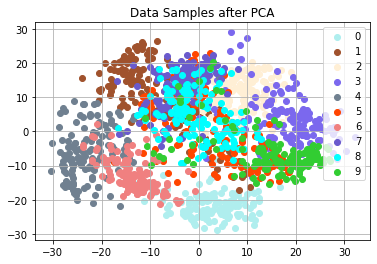

In [22]:
colorlist = random.sample(list(colors.cnames.values()), 10)
fig = plt.figure()
for i in range(10):
    ind = np.argwhere(y_train==i)
    ind = [s[0] for s in ind]
    plt.scatter(X_train_pca[ind,0],X_train_pca[ind,1],color = colorlist[i], label=str(i))
plt.legend()
plt.grid('off')
plt.title("Data Samples after PCA")
plt.show()

**(5 points) Question:**

- What do you think about the data distribution considering evaluation? Is 2 dimensions are enough to represent this data? 
- Both Variance Threshold and PCA are used for dimensionality reduction and reduced the size of feature space. What is the main difference between these two methods based on types of dimensionality reduction? Explain.

Accuracies of both training and testing phases decreased after PCA dimensionalty reduction. When we look at the plot in 2-dimension form, classes highly overlapping each other. Therefore, it is hard to classify data points with high accuracy. We can say that 2 dimensions is not enough to respresent and classify this data. We should prefer higher dimensionality for this case.

PCA performs feature extraction, on the other hand Variance Threshold performs feature selection. Variance Threshold keeps original feature values and it only eliminates features that are below some threshold value. PCA does not eliminate features but it tries to find lower dimensional space that represents features by using eigenvector principles and taking top prioritized n eigenvectors. Thus, it transforms features. In conclusion, feature selection methods are based on eliminating features by checkin some parameter; feature exraction methods tries to use knowledge from all features and finds lower representative feature space.





## Part 3: Solving SVM optimization by hand (40 points)

You can insert the screenshots of your handwritten solution on Jupyter Notebook. For an example, check the cells including images. Do not forget to include your solution image file into the submitted .zip file.

Some reminders for the question:

 - Lagrangian to optimize: $\mathcal{L}_{primal} = \sum_{i=1}^{n} a_{i} - \frac{1}{2} [\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}x_{i}^{T}x^{j}] $ 


- Constraint: $\sum_{i=1}^{n} \alpha_{i} y_{i} = 0$


- Optimal parameter: $w^{*} = \sum_{i=1}^{n} \alpha_{i} y_{i} x^{i}$

### Part 3.1 (20 points)

<p style="float: left;"><img src="images/part3-1.png" width = "200"></p>
        
        Given the two following training samples (n=2), provide below a step-by-step solution
        to estimate the optimal parameters (w and b) of the hyperplane separating the two classes.

### Part 3.1 Solution

I have solved SVM optimization problem for our case.

<img src="images/part-1-1.jpg" width = "400">

<br>

<img src="images/part-1-2.jpg" width = "400">

### Part 3.2 (10 points) 
If we add a third training point $x_3 = \left [\begin{matrix} -1 \\ 0 \end{matrix}\right] $, will that impact the hyperplane estimated using points $x_1$ and $x_2$? Answer this considering two cases where label for $x_3$ is (1) positive, (2) negative and justify.

### Part 3.2 Solution

In this problem, we have to look at data points that determine support vectors. When we add new data point that changes margin between classes, we have to reoptimize our model for new dataset. In our scenario, x3 locates between two points and it narrows margin between classes in both cases. Therefore, x3 impacts estimated hyperplane in both cases.

<img src="images/part-2-1.jpg" width = "400">

<br>

<img src="images/part-2-2.jpg" width = "400">

### Part 3.3 (10 points)
Explain how to classify the point $x_{test} = \left [\begin{matrix} 1 \\ -4 \end{matrix}\right] $ using the estimated model. What is the predicted label of $x^{test}$? 

### Part 3.3 Solution

I have directly performed classification criterion.

<img src="images/part-3.jpg" width = "400">